
 # Determinación de los parámetros cosmológicos a partir de métodos de aprendizaje automático



### Martín de los Rios, Mariano Dominguez

In [11]:
#Funciones necesarias para correr todo
#Feature selection por bineado
#{{{
feature.select<-function(x,y,n.feat,x.min,x.max){
  #xbin=(max(x)-min(x))/(n.feat)
  xbin=(x.max-x.min)/(n.feat)

  y.feat<-1:n.feat
  x.feat<-1:n.feat

  dx=0.00001 #Es para evitar que el maximo se quede afuera por redondeo de la compu
  for(i in 1:n.feat){
    #x.feat[i]=min(x)+xbin*(2*(i-1)+1)/2
    x.feat[i]=x.min+xbin*(2*(i-1)+1)/2
    xmin=x.feat[i]-xbin/2
    xmax=x.feat[i]+xbin/2
    y.aux<-y[which(x>=(xmin-dx) & x<=(xmax+dx))]
    if(length(y.aux) > 1){
      y.feat[i]=mean(y.aux)
    } else if (length(y.aux) == 1){
      y.feat[i]= y.aux[1]
    } else if (length(y.aux) == 0){
      y.feat[i]= -9999
    }
  }

  for(i in 1:n.feat){
    if(y.feat[i] == -9999){
      ysup=-9999
      yinf=-9999
      for(j in 1:(n.feat-1)){
        if(ysup<0 & (i+j) <= n.feat){
          if(y.feat[i+j] > 0){ysup=y.feat[i+j]}
        }
        if(yinf<0 & (i-j) > 0){
          if(y.feat[i-j] > 0){yinf=y.feat[i-j]}
        }
      }
      y.feat[i]=(ysup+yinf)/2
    }
  }

  y.feat[which(y.feat < 0)]=0

  mat<-data.frame(x.feat,y.feat)
  return(mat)
}
#}}}
#Feature selection por bineado (cmb)
#{{{
feature.select.cmb<-function(x,y,n.feat){
  xbin=(max(x)-min(x))/(n.feat)

  y.feat<-1:n.feat
  x.feat<-1:n.feat

  for(i in 1:n.feat){
    x.feat[i]=min(x)+xbin*(2*(i-1)+1)/2
    xmin=x.feat[i]-xbin/2
    xmax=x.feat[i]+xbin/2
    y.feat[i]=mean(y[which(x>=xmin & x<xmax)])
  }

  mat<-data.frame(x.feat,y.feat)
}
#}}}

#PCA_mat
#{{{
PCA_mat<-function(dat){
  mat_cov<-cov(dat)
  eig<-eigen(mat_cov)
  mat_cb<-solve(eig$vectors) 

  return(mat_cb)
}
#}}}

#validacion
#{{{
validacion<-function(datos,datos_aux){

  fl=0
  datos_aux<-subset(datos_aux,datos_aux$y.feat > 0)
  for(i in 1:length(datos_aux$y.feat)){
    if((datos_aux$y.feat[i] < min(datos[,4+i]) | (datos_aux$y.feat[i] > max(datos[,4+i])))){fl=1}
  }

  return(fl)
}
#}}}
#validacion1
#{{{
validacion1<-function(datos,datos_aux){

  flags<-1:length(datos_aux$y.feat)
  flags[]=0
  for(i in 1:length(datos_aux$y.feat)){
    if((datos_aux$y.feat[i] < min(datos[,4+i]) | (datos_aux$y.feat[i] > max(datos[,4+i])))){
      flags[i]=1
    }
  }

  return(flags)
}
#}}}
#rename
#{{{
rename<-function(trainset){

  name1<-colnames(trainset)[1]
  trainset_aux<-trainset[,-1]

  name<-1:(length(trainset)-1)
  for(i in 1:length(name)){
    name[i]<-paste('X',toString(i),sep='')
  }
 
  name<-c(name1,name)
  colnames(trainset)<-name
  return(trainset)
}
#}}}
#rename1
#{{{
rename1<-function(trainset){

  trainset_aux<-trainset

  name<-1:length(trainset_aux)
  for(i in 1:length(trainset_aux)){
    name[i]<-paste('X',toString(i),sep='')
  }
 
  colnames(trainset)<-name
  return(trainset)
}
#}}}
library('latex2exp')
library('caret')

Loading required package: lattice
Loading required package: ggplot2

Attaching package: ‘ggplot2’

The following object is masked from ‘package:randomForest’:

    margin



## Técnicas de Aprendizaje automático

* Aprendizaje Supervisado
* Aprendizaje no supervisado

### Aprendizaje Supervisado
<center>
<img src="aprendizaje_supervisado1.jpg" width=890>


#### Random Forest
<center>
<img src=rf.png width=800>

#### Support Vector Machine

|                           |                              |
|:--------------------------|-----------------------------:|
|<img src=svm.png width=400>| <img src= svm3.png width=800>|



#### Redes Neuronales

<center>
<img src=nn.png width=900>

#### Ejemplo simple de aprendizáje supervisado

In [8]:
summary(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

In [9]:
#Cargamos la libreria
library('randomForest')

#Separamos en set de entrenamiento y testeo
ind<-sample(x=1:length(iris$Species),replace=F,size = 120)
set_entrenamiento<-iris[ind,]
set_testeo<-iris[-ind,]

#Entrenamos un modelo de aprendizaje automático
model<-randomForest(Species~., data=set_entrenamiento)

#Predecimos la especie para el set de testeo
especie_predicha<-predict(model,newdata = set_testeo)

In [13]:
confusionMatrix(data = especie_predicha,reference = set_testeo$Species)$table

            Reference
Prediction   setosa versicolor virginica
  setosa         12          0         0
  versicolor      0          8         1
  virginica       0          1         8

### Aprendizaje No Supervisado
<center>
<img src="aprendizaje_nosupervisado.jpg" width=900>


#### Mixtura de Gaussianas

<center>
<img src=mixt_gauss.png width=900>

#### Análisis de Componentes Principales

<center>
<img src=pca_example.gif width=500>

#### Ejemplo simple de aprendizáje no supervisado

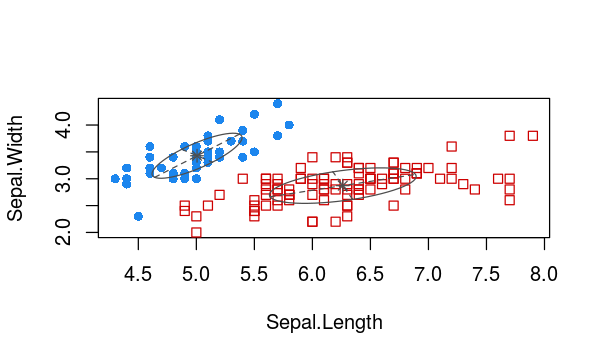

In [28]:
#Cargo la libreria
library('mclust')
#Entreno el modelo
Mclust(data = iris[,-5],G = 1:4)->model
#Visualizo los resultados
options(repr.plot.width=5, repr.plot.height=3)
plot.Mclust(model,what = 'classification',dimens = c(1,2),main='')

### El aprendizaje automático en la Astronomía.

* Ann-z: Estimación de redshift a partir de datos fotométricos utilizando redes neuronales.
* Técnicas de aprendizaje automático aplicadas a simulaciones cosmológicas para la construcción de catálogos simulados (1303.1055, 1510.07659, 1510.06402).
* Estimnación de masas de cúmulos de galaxias utilizando SDM (1509.05409).
* Clasificación morfológica de galaxias utilizando aprendizaje automático supervisado (1005.0390).

#### PAPER BRUNO Y JUAN

#### MeSsI
Clasificación de cúmulos de galaxias en proceso de fusión utilizando random forest.

<center>
<img src='messi1.jpg' width='600'>


### Sobre los parámetros cosmólogicos y como medirlos.

|||
|:------|------:|
|<img style="float: left;" src='supernovas.png' width=480>|<img style="float: right;" src='planck.png' width=610>|
|*Supernovas JLA (1512.07869)*|*Fondo Cósmico de Microondas (1502.01589)*|

<center>
<img align='center' src=bananas2.png width=700>
*Estimación de los parámetros cosmológicos (1401.4064)*

|||
|:------|------:|
|<img style="float: left;" src='matter.png' width=500>|<img style="float: right;" src='hubble.png' width=500>|
*Distribución Angular de los parámetros cosmológicos medidos con supernovas (1512.07869).*

#### Problemas
* Estimar la distribución angular de los parámetros cosmológicos utilizando datos de supernovas -> Muchos pixeles con pocos datos
* La estimación de los parámetros cosmológicos a través de datos del CMB requiere la utilización de cadenas de Markov Monte-Carlo -> Mucho Tiempo de Cómputo
* Para estimar los intervalos de confidencia, en los diferentes planos, utilizando varios conjuntos de datos se necesita conocer la matriz de covarianza entre los conjuntos de datos -> **La estimación de dicha matriz de covarianza es un tema de estudio actual**

<center>
<img src=simus.png width=970>

### Estimación de la distribución angular de los parámetros cosmológicos mediante métodos de aprendizaje automático aplicados a datos del CMB y de supernovas.


#### Soluciones

* Utilizando los datos del CMB hay una mayor cantidad de datos en todos los pixeles.
* Una vez que se construyó el conjunto de entrenamiento y se entrenó el algoritmo de aprendizaje automático, la estimación de los parámetros cosmológicos no requiere mucho tiempo de cómputo.
* No es necesario conocer la matriz de covarianza entre los diferentes conjuntos de datos.

<center>
<img align='middle' src=spec_examples.jpeg width=670>

*Espectros de potencia generados por **CAMB***

<center> Mixtura de Gaussianas

<img src=mixt_gauss.jpg width=700>

<center> Random Forest <img src=cmb_rf.jpeg width=600> $\Delta\Omega_{m}*h^{2} = 0.002$ $\Delta\Omega_{k} = 0.007$ $\Delta\Omega_{b}*h^{2} = 0.005$ $\Delta H_{0} = 2.8$


<center> Support Vector Machine <img src=cmb_svm.jpeg width=600> $\Delta\Omega_{m}*h^{2} = 0.0009$ $\Delta\Omega_{k} = 0.006$ $\Delta\Omega_{b}*h^{2} = 0.0002$ $\Delta H_{0} = 2.8$

<center> <img src=sn_examples.png width=670> *Conjunto de supernovas simuladas*

<center> Random Forest <img src=sn_570.jpeg width=600> $\Delta\Omega_{m}*h^{2} = 0.01$ $\Delta\Omega_{k} = 0.05$ $\Delta\Omega_{b}*h^{2} = 0.003$ $\Delta H_{0} = 1.4$

<center> Support Vector Machine <img src=sn_100.jpeg width=600> $\Delta\Omega_{m}*h^{2} = 0.01$ $\Delta\Omega_{k} = 0.06$ $\Delta\Omega_{b}*h^{2} = 0.003$ $\Delta H_{0} = 2.3$

<center> Random Forest <img src=cmb_sn_rf.jpeg width=600 > $\Delta\Omega_{m}*h^{2} = 0.003$ $\Delta\Omega_{k} = 0.005$ $\Delta\Omega_{b}*h^{2} = 0.0007$ $\Delta H_{0} = 0.5$

<center> Support Vector Machine <img src=cmb_sn_svm.jpeg width=600 > $\Delta\Omega_{m}*h^{2} = 0.001$ $\Delta\Omega_{k} = 0.004$ $\Delta\Omega_{b}*h^{2} = 0.0002$ $\Delta H_{0} = 0.27$

### Distribución angular de los parámetros cosmológicos

* Planck + Sn tipo Ia (jlca)
* Support Vector Machine
* Healpix

<center>  <img src=h_pred.png width=900 > 

<center>  <img src=om_pred.png width=900 > 

<center>  <img src=omb_pred.png width=900 > 

<center>  <img src=omk_pred.png width=900 > 

## Conclusiones y Trabajo futuro

* Desarrollamos un método de aprendizaje automático que permite calcular los parámetros cosmológicos de una manera mucho más eficiente que la tradicional.
* Este método tiene la ventaja de poder utilizar a la vez los datos de supernovas y del cmb.
* Gracias a la velocidad de dicho método, pudimos calcular los parámetros cosmológicos en diferentes sectores del cielo.

<center>
<img src=gracias.png width=1000>